In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import os
import fnmatch

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from PIL import Image

In [6]:
#Partie 1 > d > 1,2,3,4,5

np.random.seed(2)
X = np.random.rand(1000)*3

Moyenne = round(sum(X)/len(X),3)
Ecart_Type = round(np.std(X),3)
Mediane = round(np.median(X),3)

print(Moyenne," ", Ecart_Type, " ", Mediane)

X_Bis = np.random.rand(1000)*3

Moyenne = round(sum(X_Bis)/len(X_Bis),3)
Ecart_Type = round(np.std(X_Bis),3)
Mediane = round(np.median(X_Bis),3)

print(Moyenne," ", Ecart_Type, " ", Mediane)

1.462   0.852   1.409
1.461   0.884   1.413


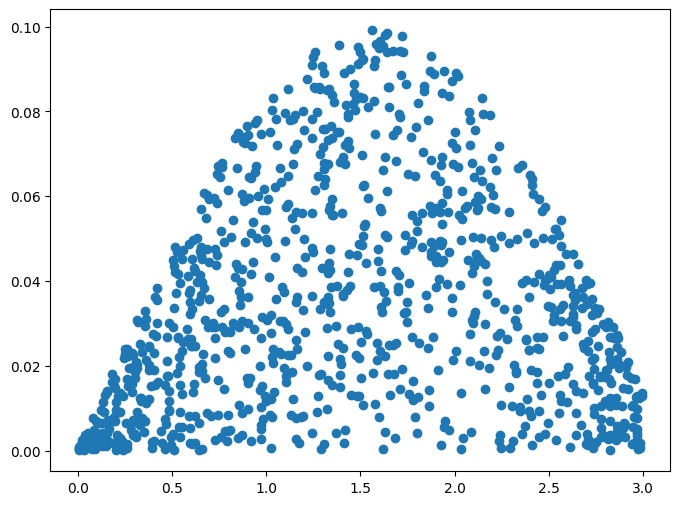

In [7]:
#Partie 1 > d > 7,8

noise = np.random.rand(1000)
y = np.sin(X)*(noise*0.1)

plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.show()

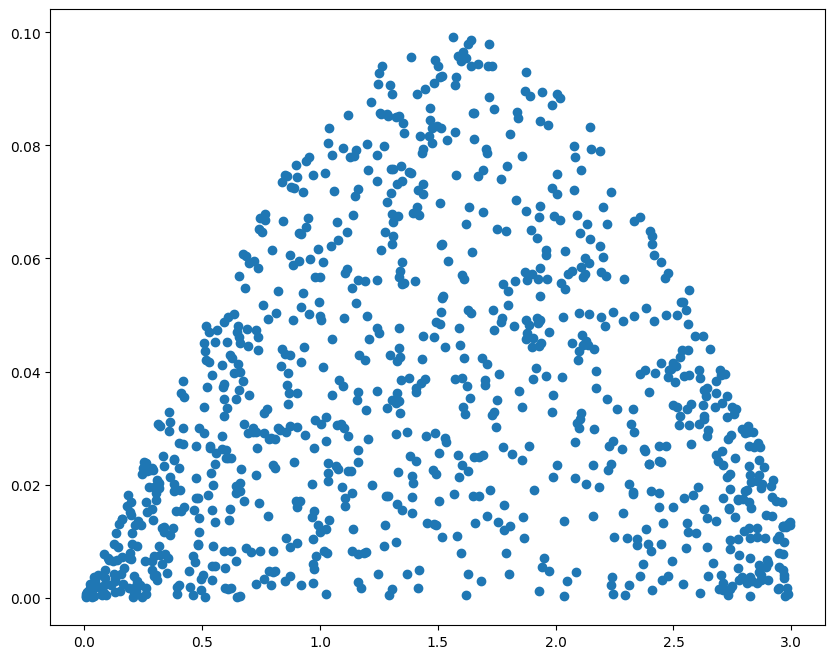

In [8]:
#Partie 1 > d > 9

plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.show()

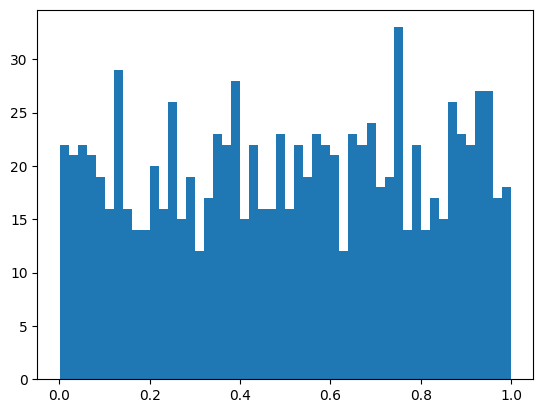

In [9]:
#Partie 1 > d > 10,11

plt.hist(noise,bins=50)
plt.show()

In [10]:
# Partie 2 > Données

# A
# Fonction pour compter les fichiers dans un dossier et ses sous-dossiers
def compter_fichiers(dossier):
    total_fichiers = 0

    for dossier_racine, _, fichiers in os.walk(dossier):
        total_fichiers += len(fichiers)

    return total_fichiers


# test
absolute_path = os.getcwd()
relative_path = "src\data1"
full_path = os.path.join(absolute_path, relative_path)
nombre_de_fichiers = compter_fichiers(full_path)

print(f"Nombre total de fichiers dans '{full_path}': {nombre_de_fichiers}")


Nombre total de fichiers dans 'c:\Users\max_m\Documents\3-Ecole\Computer Vision\ComputerVisionTP\src\data1': 916


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\max_m\AppData\Local\Temp\ipykernel_40760\1775408309.py:16: SyntaxWarning: invalid escape sequence '\d'
  relative_path = "src\data1"


In [11]:
def trouver_format_et_taille_fichiers(dossier):
    resultats = []  # Une liste pour stocker les résultats

    for racine, _, fichiers in os.walk(dossier):
        for fichier in fichiers:
            chemin_complet = os.path.join(racine, fichier)
            taille = os.path.getsize(chemin_complet)  # Taille du fichier en octets
            nom, extension = os.path.splitext(fichier)  # Sépare le nom et l'extension du fichier
            resultats.append({
                'chemin': chemin_complet,
                'nom': nom,
                'extension': extension,
                'taille': taille
            })

    return resultats

# test
resultats = trouver_format_et_taille_fichiers(full_path)

for resultat in resultats:
    print(f"Chemin : {resultat['chemin']}")
    print(f"Nom : {resultat['nom']}")
    print(f"Extension : {resultat['extension']}")
    print(f"Taille : {resultat['taille']} octets")
    print("-" * 40)

Chemin : c:\Users\max_m\Documents\3-Ecole\Computer Vision\ComputerVisionTP\src\data1\bike\Bike (1).png
Nom : Bike (1)
Extension : .png
Taille : 194361 octets
----------------------------------------
Chemin : c:\Users\max_m\Documents\3-Ecole\Computer Vision\ComputerVisionTP\src\data1\bike\Bike (10).jpeg
Nom : Bike (10)
Extension : .jpeg
Taille : 8904 octets
----------------------------------------
Chemin : c:\Users\max_m\Documents\3-Ecole\Computer Vision\ComputerVisionTP\src\data1\bike\Bike (10).jpg
Nom : Bike (10)
Extension : .jpg
Taille : 14980 octets
----------------------------------------
Chemin : c:\Users\max_m\Documents\3-Ecole\Computer Vision\ComputerVisionTP\src\data1\bike\Bike (10).png
Nom : Bike (10)
Extension : .png
Taille : 38112 octets
----------------------------------------
Chemin : c:\Users\max_m\Documents\3-Ecole\Computer Vision\ComputerVisionTP\src\data1\bike\Bike (100).jpg
Nom : Bike (100)
Extension : .jpg
Taille : 60049 octets
---------------------------------------

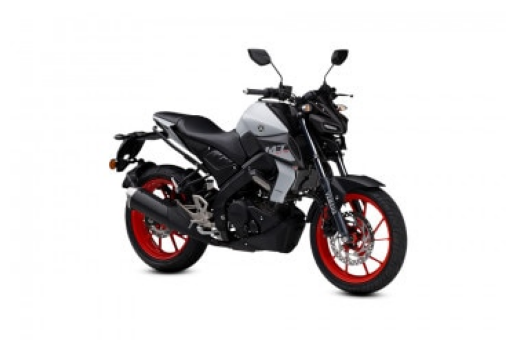

In [12]:
# 2 > C > 1

def afficher_image(chemin_fichier_image):
    try:
        # Ouvre l'image à l'aide de matplotlib.image
        image = img.imread(chemin_fichier_image)

        # Affiche l'image à l'aide de Matplotlib
        plt.imshow(image)
        plt.axis('off')  # Pour désactiver les axes
        plt.show()
    except Exception as e:
        print(f"Erreur lors de l'affichage de l'image : {str(e)}")

# Exemple d'utilisation
chemin_image = resultats[2]['chemin']  # Remplacez ceci par le chemin de votre image
afficher_image(chemin_image)

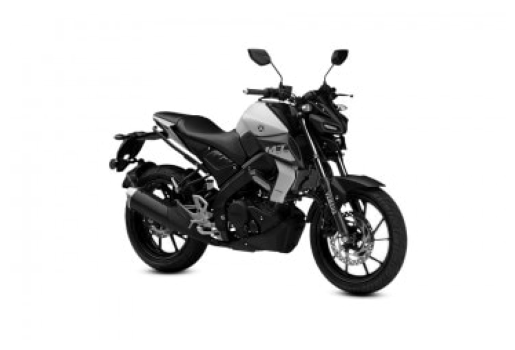

In [13]:
# 2 > C > 2

def afficher_image_Gray(chemin_fichier_image):
    try:
        # Ouvre l'image à l'aide de matplotlib.image
        image = img.imread(chemin_fichier_image)

        # Affiche l'image à l'aide de Matplotlib
        plt.imshow(image[:,:,1], cmap="gray")
        plt.axis('off')  # Pour désactiver les axes
        plt.show()
    except Exception as e:
        print(f"Erreur lors de l'affichage de l'image : {str(e)}")

# Exemple d'utilisation
chemin_image = resultats[2]['chemin']  # Remplacez ceci par le chemin de votre image
afficher_image_Gray(chemin_image)


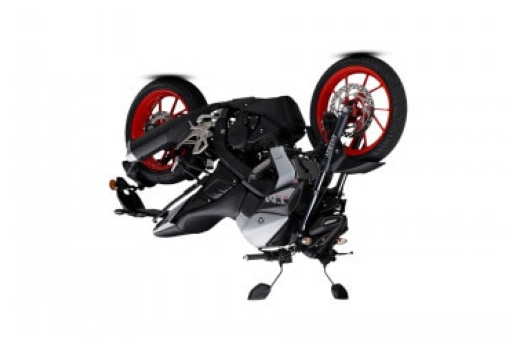

In [14]:
# 2 > C > 3

def afficher_image_inversé(chemin_fichier_image):
    try:
        # Ouvre l'image en niveaux de gris à l'aide de matplotlib.image
        image = img.imread(chemin_fichier_image)

        # Crée une figure et affiche l'image à l'envers avec origin='lower'
        plt.figure()
        plt.imshow(image, origin='lower')
        plt.axis('off')  # Pour désactiver les axes
        plt.show()
    except Exception as e:
        print(f"Erreur lors de l'affichage de l'image : {str(e)}")

# Exemple d'utilisation
chemin_image = resultats[2]['chemin']  # Remplacez ceci par le chemin de votre image
afficher_image_inversé(chemin_image)

In [15]:
# 2 > D > 1

bike_folder = "bike"
car_folder = "car"

# 2 > D > 2

target_size = (224,224)

# 2 > D > 3

def peuplate_images_and_labels_lists(image_folder_path):
    images = []
    labels = []

    for filename in os.listdir(image_folder_path):
        label = filename

        for fichier in os.listdir(os.path.join(image_folder_path, filename)):
            image = cv2.imread(os.path.join(image_folder_path, filename, fichier))

            if image is not None:
                # Redimensionner l'image à la taille cible
                image = cv2.resize(image, target_size)

                # Ajouter l'image et le label aux listes
                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)

images, labels = peuplate_images_and_labels_lists(full_path)
print(f"Nombre d'images : {len(images)}")
print(f"Nombre de labels : {len(labels)}")

Nombre d'images : 916
Nombre de labels : 916


In [16]:
# 2 > E 

images = np.array([image.flatten() for image in images])
print(images)


[[  0   0   0 ...   0   0   0]
 [255 255 255 ... 174 118  17]
 [255 255 255 ... 255 255 255]
 ...
 [  2   7   7 ...  96 153 205]
 [253 248 247 ... 105 147 182]
 [238 196 131 ...  69  61  54]]


In [17]:
# 2 > F > 1 & 2

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

# 2 > F > 3
# Il permet de gerer les random afin d'avoir des tests reproductible


Prédiction du label pour la première image : bike
Précision du modèle 1 : 0.93
Matrice de confusion :
[[82  5]
 [ 8 89]]
Spécificité (recall) du modèle (bike) : 0.94
Spécificité (recall) du modèle (car) : 0.92


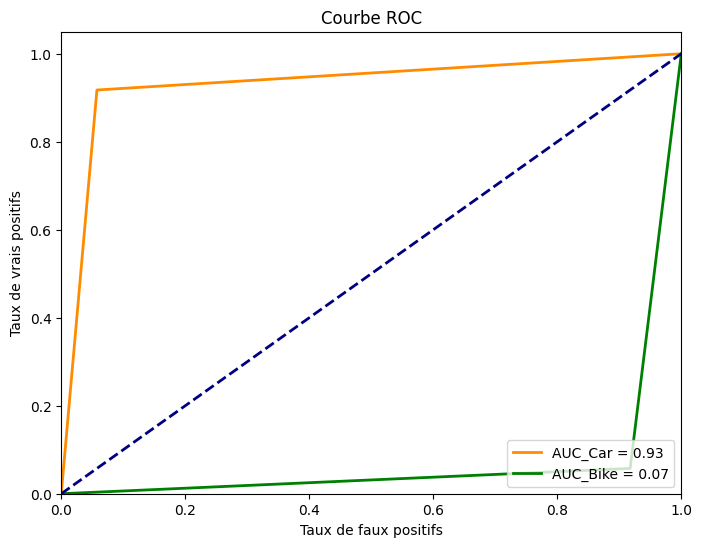

In [19]:
# 3 > A > 2
clf = DecisionTreeClassifier(random_state=0)

# 3 > A > 3
clf.fit(X_train, y_train)

# 3 > A > 4
# premiere_image = X_test[0]  # Sélection de la première image du set de test
# y_pred = clf.predict([premiere_image])
y_pred = clf.predict(X_test)
print("Prédiction du label pour la première image :", y_pred[0])

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle 1 : {accuracy:.2f}")

matrice_confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(matrice_confusion)

# Calcul du score de rappel pour la classe 'bike'
recall_bike = recall_score(y_test, y_pred, labels=['bike'], average='micro')
print(f"Spécificité (recall) du modèle (bike) : {recall_bike:.2f}")

# Calcul du score de rappel pour la classe 'car'
recall_car = recall_score(y_test, y_pred, labels=['car'], average='micro')
print(f"Spécificité (recall) du modèle (car) : {recall_car:.2f}")

fpr, tpr, seuils = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='car')
aire_sous_la_courbe_Car = auc(fpr, tpr)

fprB, tprB, seuilsB = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label='bike')
aire_sous_la_courbe_Bike = auc(fprB, tprB)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC_Car = {aire_sous_la_courbe_Car:.2f}')
plt.plot(fprB, tprB, color='green', lw=2, label=f'AUC_Bike = {aire_sous_la_courbe_Bike:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 3 > B
clf2 = SVC(kernel='linear', C=1.0, random_state=0)
clf2.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Prédiction du label pour la première image :", y_pred[0])

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle 2 : {accuracy:.2f}")

matrice_confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(matrice_confusion)

Prédiction du label pour la première image : bike
Précision du modèle 2 : 0.93
Matrice de confusion :
[[82  5]
 [ 8 89]]


In [ ]:
# 3 > A
profondeur_arbre = clf.tree_.max_depth
print(f"Profondeur de l'arbre de décision : {profondeur_arbre}")

# 3 > B > 1
max_depth_list = list(range(1, 13))

# 3 > B > 2
train_accuracy = []  # Liste pour stocker les précisions d'entraînement
test_accuracy = []   # Liste pour stocker les précisions de test

for max_depth in max_depth_list:
    # Créer et entraîner un arbre de décision avec la profondeur actuelle
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Prédire sur l'ensemble d'entraînement et de test
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculer les précisions et les ajouter aux listes correspondantes
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Afficher les précisions pour chaque max_depth
for i, max_depth in enumerate(max_depth_list):
    print(f"max_depth = {max_depth}: Train Accuracy = {train_accuracy[i]:.2f}, Test Accuracy = {test_accuracy[i]:.2f}")



Profondeur de l'arbre de décision : 7
max_depth = 1: Train Accuracy = 0.94, Test Accuracy = 0.92
max_depth = 2: Train Accuracy = 0.97, Test Accuracy = 0.93
max_depth = 3: Train Accuracy = 0.98, Test Accuracy = 0.95
max_depth = 4: Train Accuracy = 0.98, Test Accuracy = 0.93
max_depth = 5: Train Accuracy = 0.99, Test Accuracy = 0.94
max_depth = 6: Train Accuracy = 1.00, Test Accuracy = 0.93
max_depth = 7: Train Accuracy = 1.00, Test Accuracy = 0.93
max_depth = 8: Train Accuracy = 1.00, Test Accuracy = 0.93
max_depth = 9: Train Accuracy = 1.00, Test Accuracy = 0.93
max_depth = 10: Train Accuracy = 1.00, Test Accuracy = 0.93
max_depth = 11: Train Accuracy = 1.00, Test Accuracy = 0.93
max_depth = 12: Train Accuracy = 1.00, Test Accuracy = 0.93


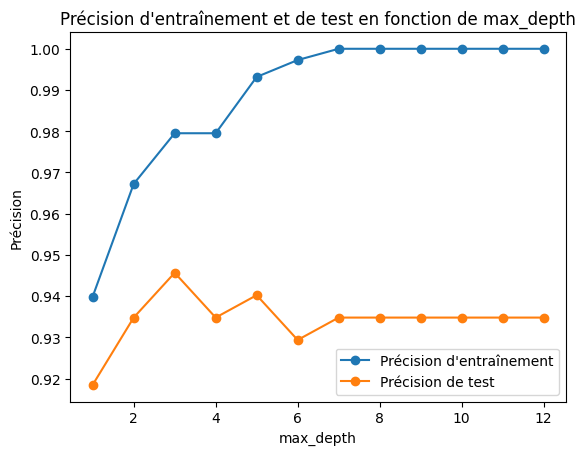

In [ ]:
# 3 > B > 3
# Tracer les courbes
plt.plot(max_depth_list, train_accuracy, label='Précision d\'entraînement', marker='o')
plt.plot(max_depth_list, test_accuracy, label='Précision de test', marker='o')

# Ajouter une légende
plt.legend()

# Étiquettes des axes
plt.xlabel('max_depth')
plt.ylabel('Précision')

# Titre du graphique
plt.title('Précision d\'entraînement et de test en fonction de max_depth')

# Afficher le graphique
plt.show()